# **Classifications of rare diseases:**

El objetivo es predecir el tipo de trastorno o enfermedad con base en los datos de los ansestros.

El contexto comercial podría ser que el modelo es utilizado en hospitales o clínicas especializadas para mejorar los procesos de diagnóstico, especialmente cuando los médicos enfrentan enfermedades raras o complejas que no tienen patrones evidentes.
También las empresas de seguros podrían beneficiarse de este tipo de modelo para evaluar mejor los riesgos asociados con ciertas enfermedades y trastornos.
Y otro puede ser las empresas farmacéuticas para mejorar la investigación y desarrollo de medicamentos destinados a enfermedades raras o trastornos específicos.

## **Lectura de datos:**

### **Librerias necesarias:**

In [3]:
import pandas as pd               #Importamos todas las librerias que vamos a
import numpy as np                #trabajar
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import urllib.request
from google.colab import files

### **Lectura del Dataset:**

In [4]:
uploaded = files.upload()

Saving en_product3_146.xml to en_product3_146.xml
Saving en_product3_147.xml to en_product3_147.xml
Saving en_product3_148.xml to en_product3_148.xml
Saving en_product3_150.xml to en_product3_150.xml
Saving en_product3_152.xml to en_product3_152.xml
Saving en_product3_156.xml to en_product3_156.xml
Saving en_product3_182.xml to en_product3_182.xml


In [5]:
#url1='https://github.com/felipeduque2411/Classification_disease/blob/main/en_product3_146.xml'
#response1 = urllib.request.urlopen(url1)
#xml_dato1 = response1.read()
#dxml_dato1=xml_dato1.decode('ISO-8859-1')
#tree1 = ET.ElementTree(ET.fromstring(xml_dato1))

In [6]:
filename1 = 'en_product3_146.xml'
filename2 = 'en_product3_150.xml'
filename3 = 'en_product3_148.xml'
filename4 = 'en_product3_147.xml'
filename5 = 'en_product3_152.xml'
filename6 = 'en_product3_156.xml'
filename7 = 'en_product3_182.xml'

In [7]:
# Parsear el archivo XML
tree1 = ET.parse(filename1)
tree2 = ET.parse(filename2)
tree3 = ET.parse(filename3)
tree4 = ET.parse(filename4)
tree5 = ET.parse(filename5)
tree6 = ET.parse(filename6)
tree7 = ET.parse(filename7)

In [8]:
# Cargar el archivo XML
root = tree1.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra
    xrama = rama #Variable auxiliar para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_children = False
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_children = False
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = False
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = False
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = False
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_children = True
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              xrama=rama
              has_children = True
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = True
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = True
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = True
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Rama': xrama,
          'Has Children': has_children,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df1 = pd.DataFrame(classifications)

In [9]:
# Cargar el archivo XML
root = tree2.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra
    xrama  = rama #Variable auxiliar para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_children = False
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_children = False
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = False
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = False
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = False
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_children = True
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              xrama=rama
              has_children = True
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = True
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = True
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = True
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Rama': xrama,
          'Has Children': has_children,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df2 = pd.DataFrame(classifications)

In [10]:
# Cargar el archivo XML
root = tree3.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra
    xrama = rama #Variable auxiliar para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_children = False
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_children = False
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = False
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = False
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = False
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_children = True
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              xrama=rama
              has_children = True
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = True
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = True
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = True
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Rama': xrama,
          'Has Children': has_children,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df3 = pd.DataFrame(classifications)

In [11]:
# Cargar el archivo XML
root = tree4.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra
    xrama = rama  #Variable auxiliar para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_children = False
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_children = False
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = False
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = False
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = False
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_children = True
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              xrama=rama
              has_children = True
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = True
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = True
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = True
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Rama': xrama,
          'Has Children': has_children,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df4 = pd.DataFrame(classifications)

In [12]:
# Cargar el archivo XML
root = tree5.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra
    xrama = rama  #Variable auxiliar para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_children = False
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_children = False
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = False
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = False
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = False
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_children = True
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              xrama=rama
              has_children = True
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = True
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = True
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = True
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Rama': xrama,
          'Has Children': has_children,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df5 = pd.DataFrame(classifications)

In [13]:
# Cargar el archivo XML
root = tree6.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra
    xrama = rama  #Variable auxiliar para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_children = False
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_children = False
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = False
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = False
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = False
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_children = True
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              xrama=rama
              has_children = True
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = True
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = True
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = True
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Rama': xrama,
          'Has Children': has_children,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df6 = pd.DataFrame(classifications)

In [14]:
# Cargar el archivo XML
root = tree7.getroot()

# Crear listas para almacenar los datos
classifications = []

# Recorrer las clasificaciones en el XML
for classification in root.findall('.//Classification'):
    classification_id = classification.get('id')
    orpha_number = classification.find('OrphaNumber').text
    classification_name = classification.find('Name').text

    var_conteo_classificationNode = 0        #cuenta cuantas clasificaciones
    rama = 1 #Variable para saber en qué rama se encuentra
    xrama = rama  #Variable auxiliar para saber en qué rama se encuentra

    limit_c1 = 0    #limite ciclo1
    limit_c2 = 0    #limite ciclo2
    limit_c3 = 0    #limite ciclo3
    limit_c4 = 0    #limite ciclo4
    limit_c5 = 0    #limite ciclo5

    temp_c1_orpha_code = None       #variables temporales para guardar los diferentes ansestros
    temp_c1_disorder_name = None
    temp_c1_disorder_type = None
    temp_c2_orpha_code = None
    temp_c2_disorder_name = None
    temp_c2_disorder_type = None
    temp_c3_orpha_code = None
    temp_c3_disorder_name = None
    temp_c3_disorder_type = None
    temp_c4_orpha_code = None
    temp_c4_disorder_name = None
    temp_c4_disorder_type = None
    temp_c5_orpha_code = None
    temp_c5_disorder_name = None
    temp_c5_disorder_type = None

    a = 0
    e = 0
    i = 0
    o = 0
    u = 0

    # Recorrer los nodos de clasificación
    for node in classification.findall('.//ClassificationNode'):
      for disorder in node.findall('Disorder'):
        disorder_id = disorder.get('id')
        orpha_code = disorder.find('OrphaCode').text
        expert_link = disorder.find('ExpertLink').text
        disorder_name = disorder.find('Name').text
        disorder_type = disorder.find('DisorderType/Name').text

        #Tiene hijos?
        child_nodes = node.find('ClassificationNodeChildList')
        v_fija_hijos = int(child_nodes.get('count'))

        #Movimiento entre ramas preguntando, si tiene hijos
        if v_fija_hijos == 0:  #no tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_children = False
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                  rama = 1
                  e = 0
              else:
                  e += 1
              has_children = False
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = "N/A"
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = False
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disorder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = False
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = False
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue
        else: #si tiene hijos
          if rama == 1:  #Es la rama 1
            xrama=rama
            limit_c1 = v_fija_hijos
            has_children = True
            has_parent = False
            parent_orpha_code = 0
            parent_disorder_name = "N/A"
            parent_disorder_type = "N/A"
            has_grandparent = False
            grandparent_orpha_code = 0
            grandparent_disorder_name = "N/A"
            grandparent_disorder_type = "N/A"
            has_parent3 = False
            parent3_orpha_code = 0
            parent3_disorder_name = "N/A"
            parent3_disorder_type = "N/A"
            has_parent4 = False
            parent4_orpha_code = 0
            parent4_disorder_name = "N/A"
            parent4_disorder_type = "N/A"
            #Guarda en las variables temporales
            temp_c1_orpha_code = orpha_code
            temp_c1_disorder_name = disorder_name
            temp_c1_disorder_type = disorder_type
            rama = 2
          else:
            if rama == 2:  #Es la rama 2
              xrama=rama
              limit_c2 = v_fija_hijos
              if e == limit_c1-1:
                rama = 1
                e = 0
              else:
                e += 1
              xrama=rama
              has_children = True
              has_parent = True
              parent_orpha_code = temp_c1_orpha_code
              parent_disorder_name = temp_c1_disorder_name
              parent_disorder_type = temp_c1_disorder_type
              has_grandparent = False
              grandparent_orpha_code = 0
              grandparent_disorder_name = "N/A"
              grandparent_disorder_type = "N/A"
              has_parent3 = False
              parent3_orpha_code = 0
              parent3_disorder_name = "N/A"
              parent3_disorder_type = "N/A"
              has_parent4 = False
              parent4_orpha_code = 0
              parent4_disorder_name = "N/A"
              parent4_disorder_type = "N/A"
              #Guarda en las variables temporales
              temp_c2_orpha_code = orpha_code
              temp_c2_disorder_name = disorder_name
              temp_c2_disorder_type = disorder_type
              temp_c1_disirder_orpha_code = parent_orpha_code
              temp_c1_disorder_name = parent_disorder_name
              temp_c1_disorder_type = parent_disorder_type
              rama = 3
            else:
              if rama == 3:  #Es la rama 3
                xrama=rama
                limit_c3 = v_fija_hijos
                if i == limit_c2-1:
                  rama = 2
                  i = 0
                else:
                  i += 1
                has_children = True
                has_parent = True
                parent_orpha_code = temp_c2_orpha_code
                parent_disorder_name = temp_c2_disorder_name
                parent_disorder_type = temp_c2_disorder_type
                has_grandparent = True
                grandparent_orpha_code = temp_c1_orpha_code
                grandparent_disorder_name = temp_c1_disorder_name
                grandparent_disorder_type = temp_c1_disorder_type
                has_parent3 = False
                parent3_orpha_code = 0
                parent3_disorder_name = "N/A"
                parent3_disorder_type = "N/A"
                has_parent4 = False
                parent4_orpha_code = 0
                parent4_disorder_name = "N/A"
                parent4_disorder_type = "N/A"
                #Guarda en las variables temporales
                temp_c3_orpha_code = orpha_code
                temp_c3_disorder_name = disorder_name
                temp_c3_disorder_type = disorder_type
                temp_c2_disirder_orpha_code = parent_orpha_code
                temp_c2_disorder_name = parent_disorder_name
                temp_c2_disorder_type = parent_disorder_type
                temp_c1_disorder_orpha_code = grandparent_orpha_code
                temp_c1_disorder_name = grandparent_disorder_name
                temp_c1_disorder_type = grandparent_disorder_type
                rama = 4
              else:
                if rama == 4:  #Es la rama 4
                  xrama=rama
                  limit_c4 = v_fija_hijos
                  if o == limit_c3-1:
                    rama = 3
                    o = 0
                  else:
                    o += 1
                  has_children = True
                  has_parent = True
                  parent_orpha_code = temp_c3_orpha_code
                  parent_disorder_name = temp_c3_disorder_name
                  parent_disorder_type = temp_c3_disorder_type
                  has_grandparent = True
                  grandparent_orpha_code = temp_c2_orpha_code
                  grandparent_disorder_name = temp_c2_disorder_name
                  grandparent_disorder_type = temp_c2_disorder_type
                  has_parent3 = True
                  parent3_orpha_code = temp_c1_orpha_code
                  parent3_disorder_name = temp_c1_disorder_name
                  parent3_disorder_type = temp_c1_disorder_type
                  has_parent4 = False
                  parent4_orpha_code = 0
                  parent4_disorder_name = "N/A"
                  parent4_disorder_type = "N/A"
                  #Guarda en las variables temporales
                  temp_c4_orpha_code = orpha_code
                  temp_c4_disorder_name = disorder_name
                  temp_c4_disorder_type = disorder_type
                  temp_c3_disirder_orpha_code = parent_orpha_code
                  temp_c3_disorder_name = parent_disorder_name
                  temp_c3_disorder_type = parent_disorder_type
                  temp_c2_disorder_orpha_code = grandparent_orpha_code
                  temp_c2_disorder_name = grandparent_disorder_name
                  temp_c2_disorder_type = grandparent_disorder_type
                  temp_c1_disorder_orpha_code = parent3_orpha_code
                  temp_c1_disorder_name = parent3_disorder_name
                  temp_c1_disorder_type = parent3_disorder_type
                  rama = 5
                else:
                  if rama == 5:  #Es la rama 5
                    xrama=rama
                    limit_c5 = v_fija_hijos
                    if u == limit_c4-1:
                      rama = 4
                      u = 0
                    else:
                      u += 1
                    has_children = True
                    has_parent = True
                    parent_orpha_code = temp_c4_orpha_code
                    parent_disorder_name = temp_c4_disorder_name
                    parent_disorder_type = temp_c4_disorder_type
                    has_grandparent = True
                    grandparent_orpha_code = temp_c3_orpha_code
                    grandparent_disorder_name = temp_c3_disorder_name
                    grandparent_disorder_type = temp_c3_disorder_type
                    has_parent3 = True
                    parent3_orpha_code = temp_c2_orpha_code
                    parent3_disorder_name = temp_c2_disorder_name
                    parent3_disorder_type = temp_c2_disorder_type
                    has_parent4 = True
                    parent4_orpha_code = temp_c1_disirder_orpha_code
                    parent4_disorder_name = temp_c1_disorder_name
                    parent4_disorder_type = temp_c1_disorder_type
                    #Guarda en las variables temporales
                    temp_c5_orpha_code = orpha_code
                    temp_c5_disorder_name = disorder_name
                    temp_c5_disorder_type = disorder_type
                    temp_c4_disirder_orpha_code = parent_orpha_code
                    temp_c4_disorder_name = parent_disorder_name
                    temp_c4_disorder_type = parent_disorder_type
                    temp_c3_disirder_orpha_code = grandparent_orpha_code
                    temp_c3_disorder_name = grandparent_disorder_name
                    temp_c3_disorder_type = grandparent_disorder_type
                    temp_c2_disorder_orpha_code = parent3_orpha_code
                    temp_c2_disorder_name = parent3_disorder_name
                    temp_c2_disorder_type = parent3_disorder_type
                    temp_c1_disorder_orpha_code = parent4_orpha_code
                    temp_c1_disorder_name = parent4_disorder_name
                    temp_c1_disorder_type = parent4_disorder_type
                  else:
                    continue

      # Agregar los datos a la lista
      classifications.append({
          'Classification ID': classification_id,
          'Orpha Number': orpha_number,
          'Classification Name': classification_name,
          'Disorder ID': disorder_id,
          'ORPHA Code': orpha_code,
          'Expert Link': expert_link,
          'Disorder Name': disorder_name,
          'Disorder Type': disorder_type,
          'Rama': xrama,
          'Has Children': has_children,
          'Has Parent': has_parent,
          'Parent ORPHA Code': parent_orpha_code,
          'Parent Disorder Name': parent_disorder_name,
          'Parent Disorder Type': parent_disorder_type,
          'Has GrandParent': has_grandparent,
          'GrandParent ORPHA Code': grandparent_orpha_code,
          'GrandParent Disorder Name': grandparent_disorder_name,
          'GrandParent Disorder Type': grandparent_disorder_type,
          'Has 3rd Gen': has_parent3,
          '3rd Gen ORPHA Code': parent3_orpha_code,
          '3rd Gen Disorder Name': parent3_disorder_name,
          '3rd Gen Disorder Type': parent3_disorder_type,
          'Has 4th Gen': has_parent4,
          '4th Gen ORPHA Code': parent4_orpha_code,
          '4th Gen Disorder Name': parent4_disorder_name,
          '4th Gen Disorder Type': parent4_disorder_type,
          'Has 5th Gen': has_parent4,
          '5th Gen ORPHA Code': parent4_orpha_code,
          '5th Gen Disorder Name': parent4_disorder_name,
          '5th Gen Disorder Type': parent4_disorder_type
        })


# Crear un DataFrame
df7 = pd.DataFrame(classifications)

In [15]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True) # Se crea uno nuevo de todos

### **Análisis inicial del dataset:**

In [16]:
df.shape

(27114, 30)

In [17]:
df.head()

,Classification ID,Orpha Number,Classification Name,Disorder ID,ORPHA Code,Expert Link,Disorder Name,Disorder Type,Rama,Has Children,...,3rd Gen Disorder Name,3rd Gen Disorder Type,Has 4th Gen,4th Gen ORPHA Code,4th Gen Disorder Name,4th Gen Disorder Type,Has 5th Gen,5th Gen ORPHA Code,5th Gen Disorder Name,5th Gen Disorder Type
0,146,156265,Orphanet classification of rare cardiac diseases,12948,97929,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Rare cardiac disease,Category,1,True,...,N/A,N/A,False,0,N/A,N/A,False,0,N/A,N/A
1,146,156265,Orphanet classification of rare cardiac diseases,17712,167848,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Rare cardiomyopathy,Category,2,True,...,N/A,N/A,False,0,N/A,N/A,False,0,N/A,N/A
2,146,156265,Orphanet classification of rare cardiac diseases,8591,247,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Inherited arrhythmogenic cardiomyopathy,Clinical group,3,True,...,N/A,N/A,False,0,N/A,N/A,False,0,N/A,N/A
3,146,156265,Orphanet classification of rare cardiac diseases,10333,34217,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Naxos disease,Disease,4,False,...,Rare cardiac disease,Category,False,0,N/A,N/A,False,0,N/A,N/A
4,146,156265,Orphanet classification of rare cardiac diseases,18885,217656,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Inherited isolated arrhythmogenic cardiomyopathy,Disease,4,True,...,Rare cardiac disease,Category,False,0,N/A,N/A,False,0,N/A,N/A


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Classification ID          27114 non-null  object
 1   Orpha Number               27114 non-null  object
 2   Classification Name        27114 non-null  object
 3   Disorder ID                27114 non-null  object
 4   ORPHA Code                 27114 non-null  object
 5   Expert Link                27114 non-null  object
 6   Disorder Name              27114 non-null  object
 7   Disorder Type              27114 non-null  object
 8   Rama                       27114 non-null  int64 
 9   Has Children               27114 non-null  bool  
 10  Has Parent                 27114 non-null  bool  
 11  Parent ORPHA Code          27114 non-null  object
 12  Parent Disorder Name       27114 non-null  object
 13  Parent Disorder Type       27114 non-null  object
 14  Has Gr

In [19]:
df.describe(include=('object')).T

,count,unique,top,freq
Classification ID,27114,7,156,18538
Orpha Number,27114,7,158293,18538
Classification Name,27114,7,Orphanet classification of rare genetic diseases,18538
Disorder ID,27114,7485,206,33
ORPHA Code,27114,7485,648,33
Expert Link,27114,7485,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,33
Disorder Name,27114,7485,Noonan syndrome,33
Disorder Type,27114,11,Disease,9298
Parent ORPHA Code,27114,1690,611327,1736
Parent Disorder Name,27114,1690,Genetic multiple congenital anomalies/dysmorph...,1736


Dataset con 27114 filas y 25 columnas que por el momento tienen el tipo objeto. Vamos a retirar columnas que para este objetivo no nos interesan, como la mayoría de ID y otras. Las columnas restantes vamos a manejarlas como string y las boolean pasarlas como 1 y 0 respectivamente.
 1   Orpha Number               Drop
 2   Classification Name        Drop
 3   Disorder ID                Drop
 4   ORPHA Code                 String
 5   Expert Link                Drop
 6   Disorder Name              String
 7   Disorder Type              String
 8   Has Parent                 bool  
 9   Parent ORPHA Code          Drop
 10  Parent Disorder Name       String
 11  Parent Disorder Type       String
 12  Has GrandParent            bool  
 13  GrandParent ORPHA Code     Drop
 14  GrandParent Disorder Name  String
 15  GrandParent Disorder Type  String
 16  Has 3rd Gen                bool  
 17  3rd Gen ORPHA Code         Drop
 18  3rd Gen Disorder Name      String
 19  Has 4th Gen                bool  
 20  4th Gen ORPHA Code         Drop
 21  4th Gen Disorder Name      String
 22  Has 5th Gen                bool  
 23  5th Gen ORPHA Code         Drop
 24  5th Gen Disorder Name      String

## **Limpieza y Transformación de datos:**

In [20]:
#Eliminamos las columnas que no vamos a trabajar
df.drop(columns=['Classification ID', 'Orpha Number', 'Expert Link', 'Disorder ID', 'Parent ORPHA Code', 'GrandParent ORPHA Code', '3rd Gen ORPHA Code', '4th Gen ORPHA Code', '5th Gen ORPHA Code'], inplace=True)

In [21]:
# Transformación a su correspondiente tipo de información.
df['Classification Name'] = df['Classification Name'].astype(str)
df['ORPHA Code'] = df['ORPHA Code'].astype(str)
df['Disorder Name'] = df['Disorder Name'].astype(str)
df['Disorder Type'] = df['Disorder Type'].astype(str)
df['Has Children'] = df['Has Children'].astype(int)
df['Has Parent'] = df['Has Parent'].astype(int)
df['Parent Disorder Name'] = df['Parent Disorder Name'].astype(str)
df['Parent Disorder Type'] = df['Parent Disorder Type'].astype(str)
df['Has GrandParent'] = df['Has GrandParent'].astype(int)
df['GrandParent Disorder Name'] = df['GrandParent Disorder Name'].astype(str)
df['GrandParent Disorder Type'] = df['GrandParent Disorder Type'].astype(str)
df['Has 3rd Gen'] = df['Has 3rd Gen'].astype(int)
df['3rd Gen Disorder Name'] = df['3rd Gen Disorder Name'].astype(str)
df['Has 4th Gen'] = df['Has 4th Gen'].astype(int)
df['4th Gen Disorder Name'] = df['4th Gen Disorder Name'].astype(str)
df['Has 5th Gen'] = df['Has 5th Gen'].astype(int)
df['5th Gen Disorder Name'] = df['5th Gen Disorder Name'].astype(str)

In [22]:
#Se verifican variables duplicadas.
df.duplicated().sum()

334

In [23]:
#se eliminan duplicados
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
#Valores nulos
df.isnull().sum()

,0
Classification Name,0
ORPHA Code,0
Disorder Name,0
Disorder Type,0
Rama,0
Has Children,0
Has Parent,0
Parent Disorder Name,0
Parent Disorder Type,0
Has GrandParent,0


## **Análisis exploratorio de datos:**

### **General:**

In [26]:
df.describe(include=('int64')).T

,count,mean,std,min,25%,50%,75%,max
Rama,26780.0,3.931367,1.004487,1.0,3.0,4.0,5.0,5.0
Has Children,26780.0,0.158925,0.365613,0.0,0.0,0.0,0.0,1.0
Has Parent,26780.0,0.983196,0.128537,0.0,1.0,1.0,1.0,1.0
Has GrandParent,26780.0,0.907879,0.289202,0.0,1.0,1.0,1.0,1.0
Has 3rd Gen,26780.0,0.699552,0.458461,0.0,0.0,1.0,1.0,1.0
Has 4th Gen,26780.0,0.342756,0.474640,0.0,0.0,0.0,1.0,1.0
Has 5th Gen,26780.0,0.342756,0.474640,0.0,0.0,0.0,1.0,1.0


In [27]:
df.describe(include=('object')).T

,count,unique,top,freq
Classification Name,26780,7,Orphanet classification of rare genetic diseases,18216
ORPHA Code,26780,7485,648,33
Disorder Name,26780,7485,Noonan syndrome,33
Disorder Type,26780,11,Malformation syndrome,9181
Parent Disorder Name,26780,1690,Genetic multiple congenital anomalies/dysmorph...,1671
Parent Disorder Type,26780,9,Category,19854
GrandParent Disorder Name,26780,601,N/A,2467
GrandParent Disorder Type,26780,5,Category,22971
3rd Gen Disorder Name,26780,192,N/A,8046
3rd Gen Disorder Type,26780,4,Category,18363


### **Preguntas:**



1.   ¿Qué porcentaje de desórdenes raros tienen relaciones genealógicas conocidas?
2.   ¿Existen patrones en la herencia genética de los desórdenes según el tipo de trastorno?
3. ¿Qué tipos de desórdenes son más propensos a tener antecedentes genealógicos en términos de cantidad de generaciones registradas?
4. ¿Qué tipo de desórdenes genéticos muestran mayor heterogeneidad en su clasificación (con múltiples desórdenes hijos)?



### **Análisis Univariado:**

**¿Qué porcentaje de desórdenes raros tienen relaciones genealógicas conocidas?:**

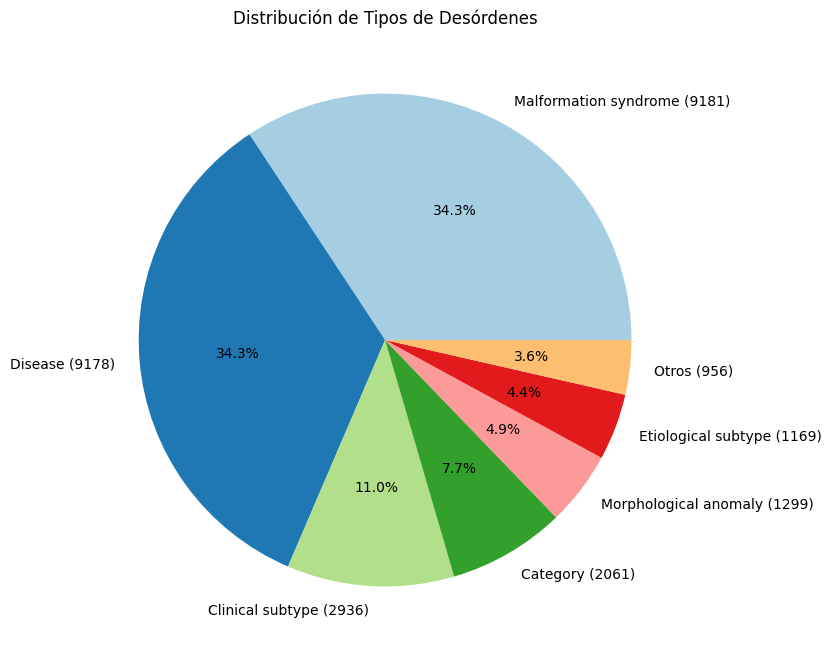

In [28]:
df_temp = df.copy()
conteo_tipo = df_temp['Disorder Type'].value_counts()

# Agrupamos los desórdenes con menos de 1000 ocurrencias bajo 'Otros'
otros = conteo_tipo[conteo_tipo < 1000].sum()  # Suma de todos los desórdenes pequeños
conteo_agrupado = conteo_tipo[conteo_tipo >= 1000]  # Mantener los que tienen >=1200
conteo_agrupado['Otros'] = otros  # Agregar la categoría 'Otros'

# Crear etiquetas combinando el nombre y la cantidad
labels = [f'{name} ({value})' for name, value in zip(conteo_agrupado.index, conteo_agrupado.values)]

fig, ax= plt.subplots(figsize=(8,8))
ax.pie(conteo_agrupado, labels=labels,  autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title('Distribución de Tipos de Desórdenes')
plt.ylabel('')
plt.show()

In [29]:
# Filtrar desórdenes
df_disorders_type = df[['Disorder Type','Has Children','Has Parent','Has GrandParent','Has 3rd Gen','Has 4th Gen','Has 5th Gen','Disorder Name']].copy()
max_disorders = df_disorders_type.shape[0]
conteo_generaciones = 0
df_disorders_type['Has Generations'] = False

# Contar cuántos tienen relaciones genealógicas conocidas (parent o grandparent)
for index, row in df_disorders_type.iterrows():
  if row['Has Parent'] == True or row['Has GrandParent']== True or row['Has 3rd Gen']== True or row['Has 4th Gen']== True or row['Has 5th Gen']== True:
    conteo_generaciones += 1
    df_disorders_type.at[index,'Has Generations'] = True
  else:
    conteo_generaciones = conteo_generaciones
    df_disorders_type.at[index,'Has Generations'] = False

# Calcular el porcentaje
percentage_with_relations = (conteo_generaciones * 100)/max_disorders

print("El ", percentage_with_relations, " de los desórdenes genéticos raros tienen relaciones genealógicas conocidas.")

El  98.31964152352502  de los desórdenes genéticos raros tienen relaciones genealógicas conocidas.


**¿Existen patrones en la herencia según el tipo de trastorno?:**

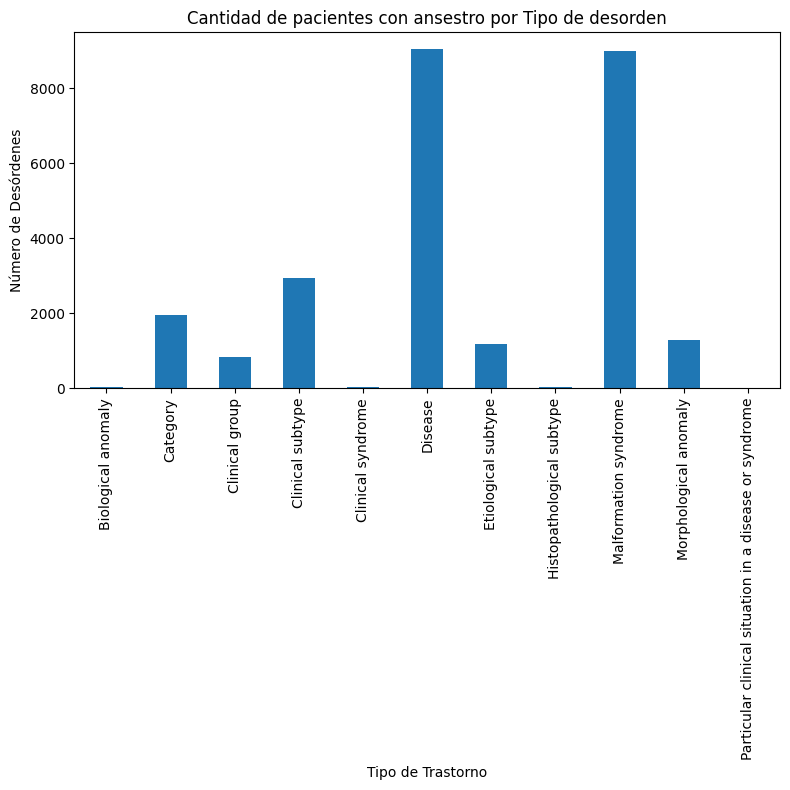

In [30]:
df_disorders_type = df_disorders_type[df_disorders_type['Has Generations']==True]

patrones_herencia = df_disorders_type.groupby('Disorder Type').size()

# Graficar
fig, ax= plt.subplots(figsize=(8,8))
patrones_herencia.plot(kind='bar', stacked=True, ax=ax)
plt.title('Cantidad de pacientes con ansestro por Tipo de desorden')
plt.xlabel('Tipo de Trastorno')
plt.ylabel('Número de Desórdenes')
plt.tight_layout()  # Ajusta el diseño para evitar recortes
plt.show()

**¿Qué tipos de desórdenes son más propensos a tener antecedentes genealógicos en términos de cantidad de generaciones registradas?**

In [31]:
# Se agrega columna indicando si tiene al menos una relación con otra generación
for index, row in df_temp.iterrows():
  if row['Has Parent'] == True or row['Has GrandParent']== True or row['Has 3rd Gen']== True or row['Has 4th Gen']== True or row['Has 5th Gen']== True:
    conteo_generaciones += 1
    df_temp.at[index,'Has Generations'] = True
  else:
    conteo_generaciones = conteo_generaciones
    df_temp.at[index,'Has Generations'] = False

In [32]:
#Solamente se dejan todos los pacientes que tienen relación con otra generación
df_temp = df_temp[df_temp['Has Generations']==True]

In [33]:
#Creamos un listado de todos los desordenes a graficar
dt_lis=df_temp['Disorder Type'].value_counts()
listado_dt = dt_lis.sort_index().index
listado_dt

Index(['Biological anomaly', 'Category', 'Clinical group', 'Clinical subtype',
       'Clinical syndrome', 'Disease', 'Etiological subtype',
       'Histopathological subtype', 'Malformation syndrome',
       'Morphological anomaly',
       'Particular clinical situation in a disease or syndrome'],
      dtype='object', name='Disorder Type')

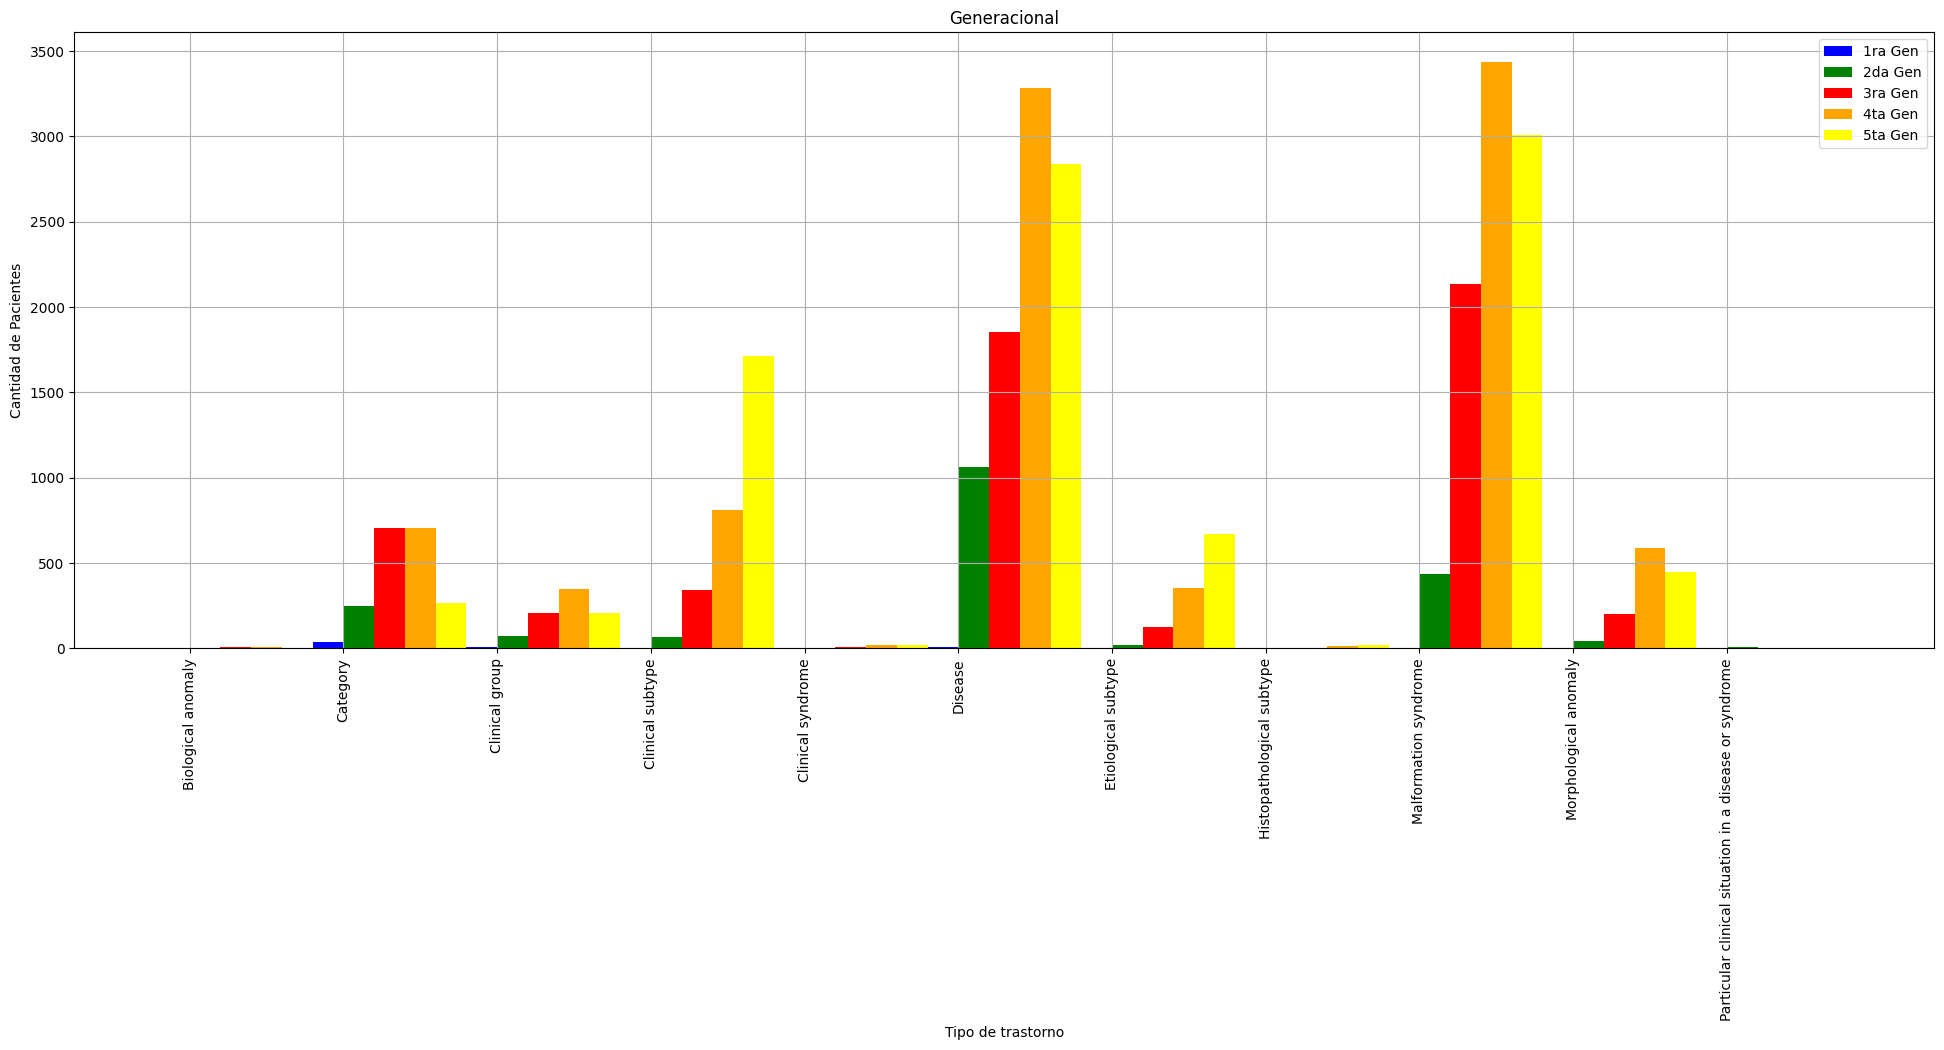

In [34]:
#Tipos de trastorno por generación
fig, ax= plt.subplots(figsize=(24,8))

ancho = 0.2
indice=np.arange(11)

#1ra generación
df_dt1 = df_temp[df_temp['Rama']== 1]
pra = df_dt1['Disorder Type'].value_counts()
for index in listado_dt:
  if index not in pra.index:
    pra[index] = 0
x1=pra.sort_index()
ax.bar(indice, x1.values, width=ancho, label='1ra Gen', color='blue', align='edge')

#2da generación
df_dt2 = df_temp[df_temp['Rama']== 2]
sda = df_dt2['Disorder Type'].value_counts()
for index in listado_dt:
  if index not in sda.index:
    sda[index] = 0
x2=sda.sort_index()
ax.bar(indice + ancho, x2.values, width=ancho, label='2da Gen', color='green', align='edge')

#3ra generación
df_dt3 = df_temp[df_temp['Rama']== 3]
tra = df_dt3['Disorder Type'].value_counts()
for index in listado_dt:
  if index not in tra.index:
    tra[index] = 0
x3=tra.sort_index()
ax.bar(indice + ancho*2, x3.values, width=ancho, label='3ra Gen', color='red', align='edge')

#4ta generación
df_dt4 = df_temp[df_temp['Rama']== 4]
cta = df_dt4['Disorder Type'].value_counts()
for index in listado_dt:
  if index not in cta.index:
    cta[index] = 0
x4=cta.sort_index()
ax.bar(indice + ancho*3, x4.values, width=ancho, label='4ta Gen', color='orange', align='edge')

#45ta generación
df_dt5 = df_temp[df_temp['Rama']== 5]
qta = df_dt5['Disorder Type'].value_counts()
for index in listado_dt:
  if index not in qta.index:
    qta[index] = 0
x5=qta.sort_index()
ax.bar(indice + ancho*4, x5.values, width=ancho, label='5ta Gen', color='yellow', align='edge')

ax.set_title('Generacional')
ax.set_xlabel('Tipo de trastorno')
ax.set_ylabel('Cantidad de Pacientes')
ax.grid(True)
plt.xticks(indice + ancho, listado_dt, rotation=90)
plt.legend()
plt.show()

**¿Qué tipo de desórdenes genéticos muestran mayor heterogeneidad en su clasificación(Con Múltiples desórdenes hijos)?**

In [35]:
listado_dt

Index(['Biological anomaly', 'Category', 'Clinical group', 'Clinical subtype',
       'Clinical syndrome', 'Disease', 'Etiological subtype',
       'Histopathological subtype', 'Malformation syndrome',
       'Morphological anomaly',
       'Particular clinical situation in a disease or syndrome'],
      dtype='object', name='Disorder Type')

In [36]:
#Volvemos a crear una copia temporal del df y reseteamos el indice para empezar de 0s
df_temp = df.copy()
df_temp.reset_index(drop=True, inplace=True)

In [37]:
# Crear un diccionario para almacenar los DataFrames por cada tipo de trastorno
dfs_por_trastorno = {}

# Bucle para filtrar y crear un DataFrame por cada tipo de trastorno
for tipo in listado_dt:
    df_filtrado = df_temp[df_temp['Parent Disorder Type'] == tipo]
    dfs_por_trastorno[tipo] = df_filtrado

In [38]:
dfs_por_trastorno.keys()

dict_keys(['Biological anomaly', 'Category', 'Clinical group', 'Clinical subtype', 'Clinical syndrome', 'Disease', 'Etiological subtype', 'Histopathological subtype', 'Malformation syndrome', 'Morphological anomaly', 'Particular clinical situation in a disease or syndrome'])

In [39]:
#Bucle para guardar en otro diccionario las listas con los valores de cada categoria por generaciones hijas
valores_por_generacion = {}
tipos = {}
for tipo in listado_dt:
  tipos[tipo] = {}
  for i in range(1,6):
    if dfs_por_trastorno[tipo]['Rama'].empty:
      continue
    else:
      valores_por_generacion[i] = dfs_por_trastorno[tipo][dfs_por_trastorno[tipo]['Rama']==i]
      tipos[tipo][i]=valores_por_generacion[i]


In [40]:
#Identificamos cuales df están vacíos
for tipo in listado_dt:
  if not tipos[tipo]:
      tipos.pop(tipo)
      print('Diccionario vacío: ',tipo, ' y eliminado del diccionario tipos.')
  else:
      continue

Diccionario vacío:  Biological anomaly  y eliminado del diccionario tipos.
Diccionario vacío:  Histopathological subtype  y eliminado del diccionario tipos.
Diccionario vacío:  Particular clinical situation in a disease or syndrome  y eliminado del diccionario tipos.


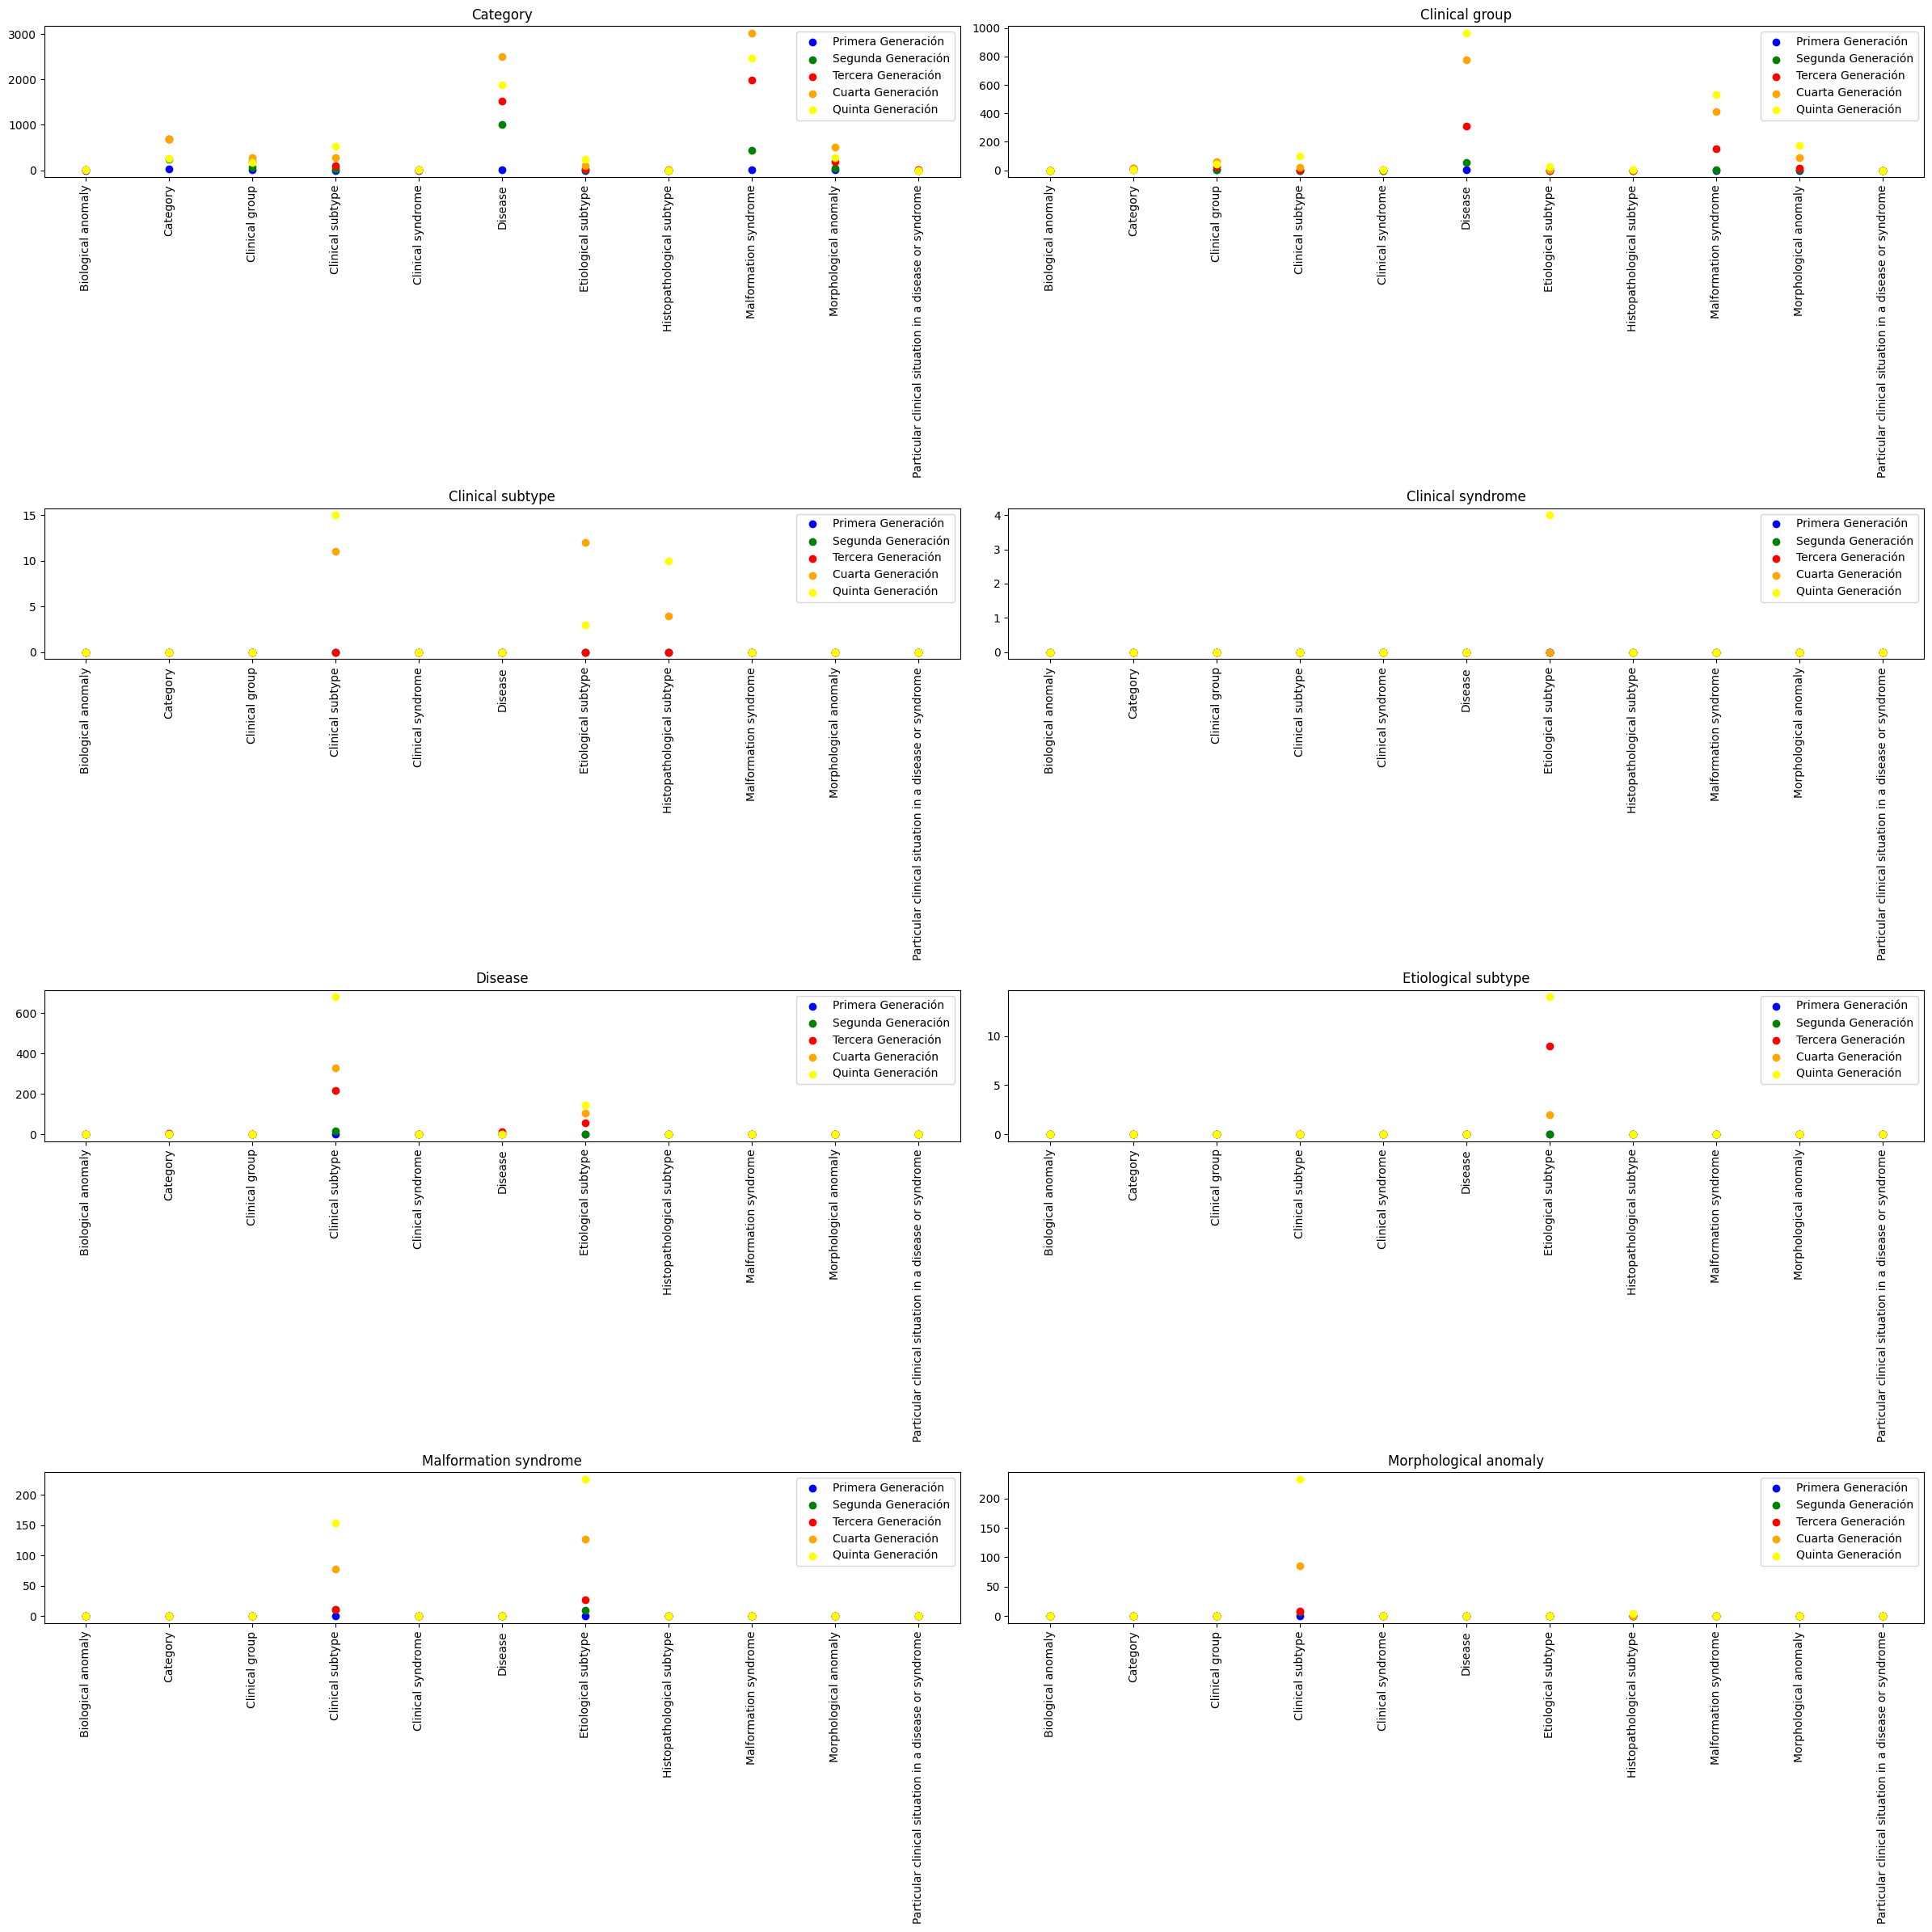

In [41]:
indice=np.arange(11)
colores = { 1: 'blue', 2:'green', 3:'red', 4:'orange', 5:'yellow'}  #Diccionario de colores
graphic_labels = { 1: 'Primera Generación', 2:'Segunda Generación', 3:'Tercera Generación', 4:'Cuarta Generación', 5:'Quinta Generación'}  #Diccionario de etiquetas
variable_g1 = None    #Variable para guardar todos los valores
variable_g2 = None    #Variable auxiliar para después de ordenar el indice

#Gráfica de Tipos
fig, axs= plt.subplots(4,2, figsize=(24,24))

for i in range(8):  # Solo 8 subgráficos
    row = i // 2  # Fila
    col = i % 2   # Columna
    listado_de_tipos = list(tipos.keys())
    tipo = listado_de_tipos[i]

    #Se dibujan los puntos dentro del gráfico
    if not tipos[tipo]:
      continue
    else:
      for a in range(1,6):    # a va de 1 a 6 cantidad de tipos disponibles
        variable_g1 = tipos[tipo][a]['Disorder Type'].value_counts()
        for index in listado_dt:    #salta de tipo en tipo preguntando si se encuentra dentro del conteo, sino 0
            if index not in variable_g1.index:
              variable_g1[index] = 0
        variable_g2=variable_g1.sort_index()
        axs[row,col].scatter(indice, variable_g2.values, c =colores[a], label = graphic_labels[a])

      # Configuraciones del subplot
      axs[row, col].set_title(tipo)
      axs[row, col].set_xticks(indice, listado_dt, rotation=90)
      axs[row, col].legend()



# Ajustar el layout
plt.tight_layout()
plt.show()

## **En búsqueda del mejor modelo:**

In [59]:
#Se van a utlizar sólo las columnas que nos puedan aportar información.
#Todas las columnas que tengan el tipo de trastorno y todas las que confirmen generación.

df_temp = df[['Parent Disorder Type', 'GrandParent Disorder Type', '3rd Gen Disorder Type', '4th Gen Disorder Type',
              '5th Gen Disorder Type', 'Disorder Type', 'Has Parent', 'Has GrandParent', 'Has 3rd Gen', 'Has 4th Gen', 'Has 5th Gen']]

In [55]:
##Librerías
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [60]:
# División de los datos
X = df_temp.drop('Disorder Type', axis=1)
y = df_temp['Disorder Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
lista_numeric_features = df_temp.select_dtypes(include=['int64', 'float64']).columns
lista_categorical_features = df_temp.select_dtypes(include=['object']).drop('Disorder Type', axis=1).columns

In [67]:
# Preprocesador
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, lista_numeric_features),
        ('cat', categorical_transformer, lista_categorical_features)])

In [68]:
params_grid = [

               {
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator':[KNeighborsClassifier()],
                'estimator__n_neighbors': [ 3, 5, 7 ],

                },

               {
                'estimator': [DecisionTreeClassifier()],
                'estimator__max_leaf_nodes': [ 5, 10, 15],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }

               , {
                'estimator': [GaussianNB()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }
              , {
                'estimator': [LogisticRegression()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }
              ,
               {
                'estimator': [RandomForestClassifier()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator__n_estimators': [ 200, 300, 500],
                'estimator__max_depth': [5, 7, 9]

                }

              ]

In [69]:
pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', LogisticRegression())])

In [70]:
GS = GridSearchCV(pipe2, params_grid)

GS.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Has Parent', 'Has GrandParent', 'Has 3rd Gen', 'Has 4th Gen',
       'Has 5th Gen'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotE...
                         {'estimator': [GaussianNB()],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']},
                         {'estimator': [LogisticRegression()],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']},
                         {'estimator': [RandomForestClassifier()],
                          'estimator__max_depth': [5, 7, 9],
                          'estimator__n_estimators': [200, 300, 500],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']}])

In [71]:
grid=pd.DataFrame(GS.cv_results_)

In [72]:
grid.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_neighbors,param_preprocessor__num__imputer__strategy,param_estimator__max_leaf_nodes,param_estimator__max_depth,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,3.936926,0.776385,0.190638,0.034644,RandomForestClassifier(),NaN,mean,NaN,7.0,300.0,"{'estimator': RandomForestClassifier(), 'estim...",0.480747,0.489848,0.483547,0.484247,0.477591,0.483196,0.004072,1
22,2.780863,0.747369,0.146404,0.025224,RandomForestClassifier(),NaN,mean,NaN,7.0,200.0,"{'estimator': RandomForestClassifier(), 'estim...",0.480513,0.489615,0.483547,0.484247,0.477591,0.483103,0.004025,2
27,3.794260,0.625192,0.211019,0.032423,RandomForestClassifier(),NaN,median,NaN,7.0,500.0,"{'estimator': RandomForestClassifier(), 'estim...",0.480980,0.489615,0.483547,0.483781,0.477591,0.483103,0.003948,2
23,2.784154,0.603183,0.159533,0.045820,RandomForestClassifier(),NaN,median,NaN,7.0,200.0,"{'estimator': RandomForestClassifier(), 'estim...",0.480747,0.489148,0.483314,0.484014,0.477824,0.483009,0.003763,4
26,3.875660,0.347608,0.198467,0.027244,RandomForestClassifier(),NaN,mean,NaN,7.0,500.0,"{'estimator': RandomForestClassifier(), 'estim...",0.480747,0.489848,0.483314,0.483781,0.477358,0.483009,0.004111,5
25,4.375258,0.978064,0.233580,0.077947,RandomForestClassifier(),NaN,median,NaN,7.0,300.0,"{'estimator': RandomForestClassifier(), 'estim...",0.480513,0.489615,0.483314,0.483781,0.477591,0.482963,0.003997,6
33,3.915555,0.372867,0.227357,0.031762,RandomForestClassifier(),NaN,median,NaN,9.0,500.0,"{'estimator': RandomForestClassifier(), 'estim...",0.480747,0.489848,0.483547,0.483781,0.476657,0.482916,0.004315,7
10,0.243308,0.014875,0.038208,0.001603,DecisionTreeClassifier(),NaN,mean,15.0,NaN,NaN,"{'estimator': DecisionTreeClassifier(), 'estim...",0.479813,0.488681,0.485414,0.484014,0.476424,0.482869,0.004300,8
11,0.248253,0.008046,0.037968,0.000824,DecisionTreeClassifier(),NaN,median,15.0,NaN,NaN,"{'estimator': DecisionTreeClassifier(), 'estim...",0.479813,0.488681,0.485414,0.484014,0.476424,0.482869,0.004300,8
29,1.806039,0.320710,0.110068,0.016980,RandomForestClassifier(),NaN,median,NaN,9.0,200.0,"{'estimator': RandomForestClassifier(), 'estim...",0.481214,0.489382,0.483547,0.482614,0.477358,0.482823,0.003900,10


In [73]:
#el pipeline ganador
GS.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Has Parent', 'Has GrandParent', 'Has 3rd Gen', 'Has 4th Gen',
       'Has 5th Gen'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Parent Disorder Type', 'GrandParent Disorder Type',
       '3rd Gen Disorder Type', '4th Gen Disorder Type',
       '5th Gen Disorder Type'],
      dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(max_depth=7, n_estimators=300))])

In [74]:
GS.best_params_

{'estimator': RandomForestClassifier(),
 'estimator__max_depth': 7,
 'estimator__n_estimators': 300,
 'preprocessor__num__imputer__strategy': 'mean'}

In [75]:
#entrenando el modelo final
modelo_final=GS.best_estimator_
modelo_final.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Has Parent', 'Has GrandParent', 'Has 3rd Gen', 'Has 4th Gen',
       'Has 5th Gen'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Parent Disorder Type', 'GrandParent Disorder Type',
       '3rd Gen Disorder Type', '4th Gen Disorder Type',
       '5th Gen Disorder Type'],
      dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(max_depth=7, n_estimators=300))])

In [76]:
modelo_final.score(X_test,y_test)

0.4865571321882001

## **Modelo de Decision Tree Clasifier:**

In [77]:
X = df_temp[['Parent Disorder Type', 'GrandParent Disorder Type', '3rd Gen Disorder Type', '4th Gen Disorder Type', '5th Gen Disorder Type']]
y = df_temp['Disorder Type']

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Codificación de etiquetas
le = LabelEncoder()
df_temp['Parent Disorder Type'] = le.fit_transform(df_temp['Parent Disorder Type'])
df_temp['GrandParent Disorder Type'] = le.fit_transform(df_temp['GrandParent Disorder Type'])
df_temp['3rd Gen Disorder Type'] = le.fit_transform(df_temp['3rd Gen Disorder Type'])
df_temp['4th Gen Disorder Type'] = le.fit_transform(df_temp['4th Gen Disorder Type'])
df_temp['5th Gen Disorder Type'] = le.fit_transform(df_temp['5th Gen Disorder Type'])
df_temp['Disorder Type'] = le.fit_transform(df_temp['Disorder Type'])

# División de los datos
X = df_temp[['Parent Disorder Type', 'GrandParent Disorder Type', '3rd Gen Disorder Type', '4th Gen Disorder Type', '5th Gen Disorder Type']]
y = df_temp['Disorder Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Probabilidades de predicción (opcional)
y_prob = model.predict_proba(X_test)


<ipython-input-78-33c7792b776b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Parent Disorder Type'] = le.fit_transform(df_temp['Parent Disorder Type'])
<ipython-input-78-33c7792b776b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['GrandParent Disorder Type'] = le.fit_transform(df_temp['GrandParent Disorder Type'])
<ipython-input-78-33c7792b776b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Accuracy: 0.48693054518297235
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00       412
           2       0.00      0.00      0.00       177
           3       0.82      0.58      0.68       605
           4       0.00      0.00      0.00        14
           5       0.56      0.37      0.44      1849
           6       0.60      0.35      0.44       231
           7       0.67      0.40      0.50         5
           8       0.42      0.83      0.56      1811
           9       0.00      0.00      0.00       243
          10       0.00      0.00      0.00         2

    accuracy                           0.49      5356
   macro avg       0.28      0.23      0.24      5356
weighted avg       0.45      0.49      0.44      5356

Confusion Matrix:
 [[   0    0    0    0    0    2    0    0    5    0    0]
 [   0    0    0    0    0   60    0    0  352    0    0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Conclusiones:**

No se logra tener un porcentaje mayor a 50% de predicción sobre la variable Disorder Type.

*   Como se ve desde las primeras gráficas, la mayor cantidad de datos se los llevan dos tipos de trastornos, la diferencia entre estos y los otros trastornos era más del doble de la cantidad de los de menor cantidad. Esto conyeva a que por más que se hayan agregado más variables el sesgo diferencial continuo.
*   El análisis que se realizó por cada uno de los trastornos a través de las otras generaciones demuestra y confirma que, la cantidad de datos frente a los otros tipos de trastorno es bastante grande y que ciertos trastornos cuentan con heterogeneidad. Por la cantidad de datos que se encuentran en los homogeneos no se lleva a cabo el posible modelado no supervisado.



